<a href="https://colab.research.google.com/github/tarannummuzaffar/super/blob/main/DL4CV_Assignment_9_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import os
from PIL import Image
import torchvision.models as models
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import torchvision
import random
from tqdm import tqdm
from torch.utils.data import random_split
from torch.autograd import Variable
import cv2
import torchvision.utils as utils
## Please DONOT remove these lines.
# Set random seed for reproducibility
torch.manual_seed(2024)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(2024)

#AUTO-ENCODERS

In [3]:
### YOUR CODE STARTS HERE ###

# Set device to cuda
#device = __
# Load and preprocess the MNIST dataset. Keep batch size equal to 128.
#transform = transforms.Compose([transforms.ToTensor()])
#train_dataset = __
#train_loader = __

# Set device to CUDA if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std
])

# Download and load the training data
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Set the DataLoader with batch size 128
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

### YOUR CODE ENDS HERE ###

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 119484855.20it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 12601237.26it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 111593432.68it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7529853.27it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Define the Autoencoder architecture
class Autoencoder(nn.Module):

    def __init__(self):
        super(Autoencoder, self).__init__()
       ### YOUR CODE STARTS HERE ###

        self.encoder = nn.Sequential(
            __, # Linear layer with input = total number of pixels in a MNIST image sample, output = 128
            __, # Relu activation
            __,  #Linear layer with input = 128, output = 64
            __, # Relu activation
            __,  #Linear layer with input = 64, output = 32
            __, # Relu activation
            __ # Linear layer with input = 32, output = 16
        )
        self.decoder = nn.Sequential(
            __, # Linear layer  with input = 16, output = 32
            __,  # Relu activation
            __, # Linear layer  with input = 32, output = 64
            __,  # Relu activation
            __, # Linear layer  with input = 64, output = 128
            __,  # Relu activation
            __, # Linear layer with input = 128 and output = total number of pixels in a MNIST image sample
            __  # Sigmoid activation
        )
    ### YOUR CODE ENDS HERE ###
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded



In [4]:
# Define the Autoencoder architecture
class Autoencoder(nn.Module):

    def __init__(self):
        super(Autoencoder, self).__init__()
        ### YOUR CODE STARTS HERE ###

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),  # Linear layer with input = total number of pixels in a MNIST image (28x28), output = 128
            nn.ReLU(),              # ReLU activation
            nn.Linear(128, 64),      # Linear layer with input = 128, output = 64
            nn.ReLU(),              # ReLU activation
            nn.Linear(64, 32),       # Linear layer with input = 64, output = 32
            nn.ReLU(),              # ReLU activation
            nn.Linear(32, 16)        # Linear layer with input = 32, output = 16
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),       # Linear layer with input = 16, output = 32
            nn.ReLU(),              # ReLU activation
            nn.Linear(32, 64),       # Linear layer with input = 32, output = 64
            nn.ReLU(),              # ReLU activation
            nn.Linear(64, 128),      # Linear layer with input = 64, output = 128
            nn.ReLU(),              # ReLU activation
            nn.Linear(128, 28*28),   # Linear layer with input = 128, output = total number of pixels in MNIST (28x28)
            nn.Sigmoid()             # Sigmoid activation (since pixel values are in range [0, 1])
        )
        ### YOUR CODE ENDS HERE ###

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image to a vector
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(-1, 1, 28, 28)  # Reshape back to (batch_size, 1, 28, 28)
        return decoded


In [ ]:
# Initialize the model, loss function, and optimizer

### YOUR CODE STARTS HERE ###

model = __ # send autoencoders to GPU
criterion = __  # Initialize MSE loss
optimizer = __  # Set Adam as optimizer

# Training loop
num_epochs = 10
for epoch in range(__):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)

        # Forward pass
        output = __
        loss = __ # Calculate the loss

        # Backward pass and optimize
        __  # Reset Gradient
        loss.__
        optimizer.__
### YOUR CODE ENDS HERE ###
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



In [5]:
# Initialize the model, loss function, and optimizer

### YOUR CODE STARTS HERE ###

model = Autoencoder().to(device)  # Send the autoencoder model to GPU (if available)
criterion = nn.MSELoss()  # Initialize MSE loss for reconstruction error
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Set Adam optimizer with a learning rate of 0.001

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data  # We only need the images, ignore the labels
        img = img.to(device)  # Send input image to the device (GPU/CPU)

        # Forward pass
        output = model(img)  # Pass the image through the autoencoder
        loss = criterion(output, img)  # Calculate the MSE loss between output and input image

        # Backward pass and optimize
        optimizer.zero_grad()  # Reset gradient to avoid accumulation
        loss.backward()  # Perform backpropagation to compute the gradients
        optimizer.step()  # Update model parameters using optimizer

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
### YOUR CODE ENDS HERE ###


Epoch [1/10], Loss: 0.6851
Epoch [2/10], Loss: 0.6404
Epoch [3/10], Loss: 0.5949
Epoch [4/10], Loss: 0.6020
Epoch [5/10], Loss: 0.5917
Epoch [6/10], Loss: 0.5815
Epoch [7/10], Loss: 0.5789
Epoch [8/10], Loss: 0.5701
Epoch [9/10], Loss: 0.5778
Epoch [10/10], Loss: 0.5640


In [6]:
# Function to visualize original and reconstructed images

def visualize_reconstruction(model, data_loader, num_images=5):
    model.eval()
    with torch.no_grad():
        for img, _ in data_loader:
            img = img.view(img.size(0), -1).to(device)
            output = model(img)

            fig, axes = plt.subplots(2, num_images, figsize=(12, 4))
            for i in range(num_images):
                axes[0, i].imshow(img[i].cpu().view(28, 28), cmap='gray')
                axes[0, i].axis('off')
                axes[1, i].imshow(output[i].cpu().view(28, 28), cmap='gray')
                axes[1, i].axis('off')

            plt.tight_layout()
            plt.show()
            break


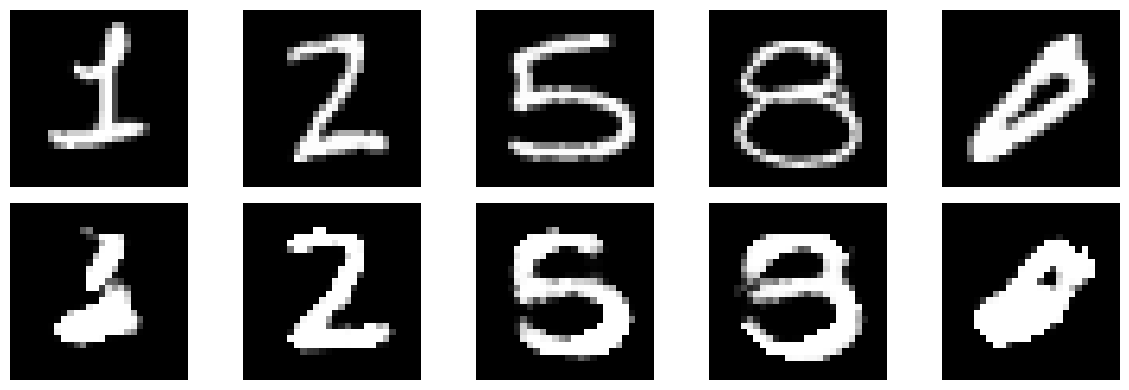

In [7]:

# Visualize some reconstructions
visualize_reconstruction(model, DataLoader(train_dataset, batch_size=32, shuffle=True))

### Question 1: Auto-Encoder
What is the loss value at the end of 10th epoch?

choose the closest option.


1.   0.0559
2.   0.0212
3.   0.2321
4.   0.9452


In [ ]:
#Define an overcomplete auto-encoder architechture

class OvercompleteAutoencoder(nn.Module):
  ### YOUR CODE STARTS HERE ###
    def __init__(self):
        super(OvercompleteAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            __,  # Linear layer for increasing dimensionality (28*28 to 512)
            __,  #Relu activation
            __,   # Linear layer for Further increase to 1024
            __,  #Relu activation
            __   # Overcomplete representation of dimention 2048
        )
        self.decoder = nn.Sequential(
            __,  # Linear layer from 2048 to 1024
            __, #Relu activation
            __, # Linear layer from 1024 to 512
            __,#Relu activation
            __, # Linear layer from 512 to 28*28
            __  #Sigmoid
        )
  ### YOUR CODE ENDS HERE ###
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [8]:
# Define an Overcomplete Autoencoder architecture
class OvercompleteAutoencoder(nn.Module):
    ### YOUR CODE STARTS HERE ###
    def __init__(self):
        super(OvercompleteAutoencoder, self).__init__()

        # Encoder: Expands the dimensionality to create an overcomplete representation
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 512),  # Linear layer from 28*28 to 512
            nn.ReLU(),              # ReLU activation
            nn.Linear(512, 1024),    # Linear layer from 512 to 1024
            nn.ReLU(),              # ReLU activation
            nn.Linear(1024, 2048)    # Overcomplete representation with 2048 dimensions
        )

        # Decoder: Reduces the dimensionality back to the original input size
        self.decoder = nn.Sequential(
            nn.Linear(2048, 1024),   # Linear layer from 2048 to 1024
            nn.ReLU(),              # ReLU activation
            nn.Linear(1024, 512),    # Linear layer from 1024 to 512
            nn.ReLU(),              # ReLU activation
            nn.Linear(512, 28*28),   # Linear layer from 512 to 28*28 (original input size)
            nn.Sigmoid()             # Sigmoid activation to constrain output in [0, 1]
        )
    ### YOUR CODE ENDS HERE ###

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image
        encoded = self.encoder(x)  # Pass through the encoder
        decoded = self.decoder(encoded)  # Pass through the decoder
        decoded = decoded.view(-1, 1, 28, 28)  # Reshape the output to match image format
        return decoded


In [ ]:
over_com_model = OvercompleteAutoencoder().to(device)
### YOUR CODE STARTS HERE ###

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1).to(device)

        # Forward pass
        output = __
        loss = __   # calculate loss

        # Backward pass and optimize
        __   # Reset Gradient
        __
        __
### YOUR CODE ENDS HERE ###
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [9]:
# Initialize the overcomplete autoencoder model and send it to the device (GPU or CPU)
over_com_model = OvercompleteAutoencoder().to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Use Mean Squared Error (MSE) as the loss function
optimizer = optim.Adam(over_com_model.parameters(), lr=0.001)  # Use Adam optimizer

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data  # Ignore the labels, we only need images
        img = img.to(device)  # Send input images to device (GPU/CPU)

        # Forward pass
        output = over_com_model(img)  # Get the reconstructed image from the model
        loss = criterion(output, img)  # Calculate the MSE loss between input and output

        # Backward pass and optimize
        optimizer.zero_grad()  # Reset gradients
        loss.backward()  # Perform backpropagation to compute gradients
        optimizer.step()  # Update model parameters

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.8421
Epoch [2/10], Loss: 0.8116
Epoch [3/10], Loss: 0.8359
Epoch [4/10], Loss: 0.8440
Epoch [5/10], Loss: 0.8550
Epoch [6/10], Loss: 0.8253
Epoch [7/10], Loss: 0.8096
Epoch [8/10], Loss: 0.8399
Epoch [9/10], Loss: 0.8409
Epoch [10/10], Loss: 0.8368


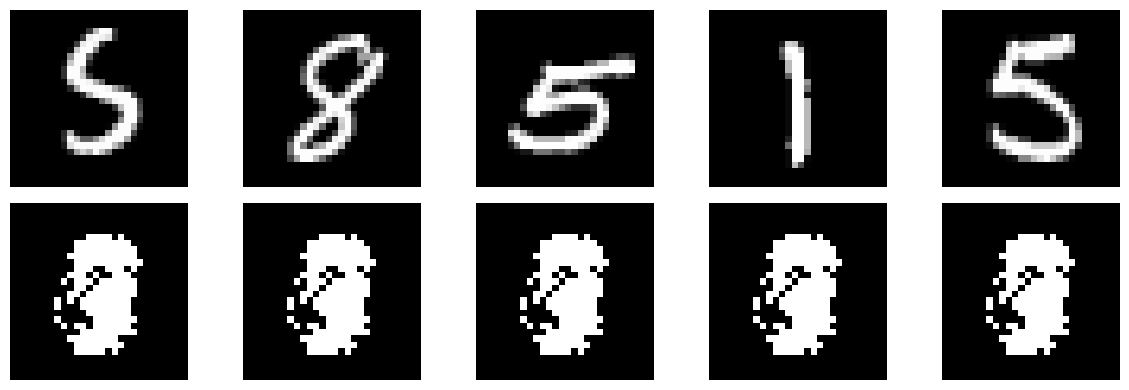

In [10]:
visualize_reconstruction(over_com_model, DataLoader(train_dataset, batch_size=32, shuffle=True))

### Question 2: Overcomplete Auto-Encoder
What is the loss value at the end of 10th epoch?

choose the closest option.


1.   0.4509
2.   0.5851
3.   0.2321
4.   0.1190



#Multi Head Attention

In [11]:
## Please DO NOT change these values.
#This is the config that will be used for implementing the Multi-head attention
config = {
    'QI_DIM': 64,
    'VI_DIM': 64,
    'KI_DIM': 64,
    'QO_DIM': 32,
    'VO_DIM': 32,
    'OP_DIM': 32,
    'NUM_HEADS': 8,
}

In [ ]:
#A class for implementing the Multi-head Attention
class MultiHeadAttention(nn.Module):

    def __init__(self, config):
        super(MultiHeadAttention, self).__init__()

        ### YOUR CODE STARTS HERE ###

        #set the op dimension, number of heads based on the value given in config
        self.op_dim = __
        self.n_heads = __

        #set the query dimension as QO_DIM from the config and value dimension as VO_DIM
        self.query_dim = __
        self.value_dim = __

        #set the respective dimensions
        self.QTrans = nn.Linear(config[___], config[___])
        self.KTrans = nn.Linear(config[___], config[___])
        self.VTrans = nn.Linear(config[___], config[___])
        self.OTrans = nn.Linear(config[___], config[___])

        #set the scaling factor as follows:
        #scale = sqrt(QO_DIM/NUM_HEADS)
        self.scale = torch.sqrt(torch.FloatTensor([self.query_dim // self.n_heads]))

        ### YOUR CODE ENDS HERE ###



    def forward(self, q_inp, k_inp, v_inp, ret_atn=False):

        #making sure that shapes are similar across dim=0
        assert q_inp.shape[0] == k_inp.shape[0]

        #setting batch size
        batch_size = q_inp.shape[0]
        seq_length = q_inp.shape[1]

        ### YOUR CODE STARTS HERE ###
        #pass q_inp, k_inp, v_inp through the linear layers defined in the
        #init function

        Q = __
        K = __
        V = __

        #reshape the Q, K, V tensors to (batch_size, num_heads, -1, self.query_dim/num_heads)
        #hint: you can also do the same by the view() of pytorch
        Q = __
        K = __
        V = __


        # define energy as matrix product of Q and K divided by self.scale value
        #hint: use torch.matmul() for this and do not forget to reshape K vector as (batch_size, num_heads, self.query_dim/num_heads, -1)
        #this should be done in order to carry out the matrix multiplication
        energy = __

        #define attention as softmax of energy vector across the last dimension
        attention = __

        ### YOUR CODE ENDS HERE ###

        #multiplying the attention with value tensor
        attended = torch.matmul(attention, V).permute(0, 2, 1, 3).contiguous()

        #passing the attended tensor through OTrans linear layer
        out = self.OTrans(attended.view(batch_size, seq_length, -1))

        if ret_atn:
            return out, attention

        else:
            return out

In [12]:
# A class for implementing the Multi-head Attention
class MultiHeadAttention(nn.Module):

    def __init__(self, config):
        super(MultiHeadAttention, self).__init__()

        ### YOUR CODE STARTS HERE ###

        # set the op dimension, number of heads based on the value given in config
        self.op_dim = config['OP_DIM']  # Output dimension
        self.n_heads = config['NUM_HEADS']  # Number of attention heads

        # set the query dimension as QO_DIM from the config and value dimension as VO_DIM
        self.query_dim = config['QO_DIM']
        self.value_dim = config['VO_DIM']

        # set the respective dimensions (linear transformations for Q, K, V)
        self.QTrans = nn.Linear(config['QI_DIM'], config['QO_DIM'])
        self.KTrans = nn.Linear(config['KI_DIM'], config['QO_DIM'])
        self.VTrans = nn.Linear(config['VI_DIM'], config['VO_DIM'])
        self.OTrans = nn.Linear(config['VO_DIM'], config['OP_DIM'])

        # set the scaling factor as follows:
        # scale = sqrt(QO_DIM / NUM_HEADS)
        self.scale = torch.sqrt(torch.FloatTensor([self.query_dim // self.n_heads]))

        ### YOUR CODE ENDS HERE ###

    def forward(self, q_inp, k_inp, v_inp, ret_atn=False):

        # making sure that shapes are similar across dim=0
        assert q_inp.shape[0] == k_inp.shape[0]

        # setting batch size
        batch_size = q_inp.shape[0]
        seq_length = q_inp.shape[1]

        ### YOUR CODE STARTS HERE ###
        # pass q_inp, k_inp, v_inp through the linear layers defined in the init function

        Q = self.QTrans(q_inp)  # Query transformation
        K = self.KTrans(k_inp)  # Key transformation
        V = self.VTrans(v_inp)  # Value transformation

        # reshape the Q, K, V tensors to (batch_size, num_heads, -1, self.query_dim/num_heads)
        # Split heads and rearrange dimensions
        Q = Q.view(batch_size, seq_length, self.n_heads, self.query_dim // self.n_heads).permute(0, 2, 1, 3)
        K = K.view(batch_size, seq_length, self.n_heads, self.query_dim // self.n_heads).permute(0, 2, 1, 3)
        V = V.view(batch_size, seq_length, self.n_heads, self.value_dim // self.n_heads).permute(0, 2, 1, 3)

        # define energy as matrix product of Q and K divided by self.scale value
        # hint: use torch.matmul() for this and reshape K vector as (batch_size, num_heads, self.query_dim/num_heads, -1)
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale

        # define attention as softmax of energy vector across the last dimension
        attention = torch.softmax(energy, dim=-1)

        ### YOUR CODE ENDS HERE ###

        # multiplying the attention with value tensor
        attended = torch.matmul(attention, V).permute(0, 2, 1, 3).contiguous()

        # passing the attended tensor through OTrans linear layer
        out = self.OTrans(attended.view(batch_size, seq_length, -1))

        if ret_atn:
            return out, attention

        else:
            return out


In [ ]:
q = torch.rand(4, 2, 64)
k = torch.rand(4, 2, 64)
v = torch.rand(4, 2, 64)
## Please DONOT remove these lines.

### YOUR CODE STARTS HERE ###

#initialise an instance of MultiHeadAttention class
d = __

#pass q, k, v values through the instance
x, y = __

#print the max value of the attention and report your answer
__

### YOUR CODE ENDS HERE ###


In [13]:
q = torch.rand(4, 2, 64)  # Query tensor
k = torch.rand(4, 2, 64)  # Key tensor
v = torch.rand(4, 2, 64)  # Value tensor

## Please DONOT remove these lines.

### YOUR CODE STARTS HERE ###

# Initialize an instance of the MultiHeadAttention class with the config
d = MultiHeadAttention(config)

# Pass q, k, v values through the instance and request the attention weights (ret_atn=True)
x, y = d(q, k, v, ret_atn=True)

# Print the max value of the attention and report your answer
print(torch.max(y))

### YOUR CODE ENDS HERE ###


tensor(0.5614, grad_fn=<MaxBackward1>)


### Question 3: MultiHead-Attention
Given a set of query, key, value vectors, calculate the attention value using multihead attention.

choose the closest option to the maximum value of the attention vector


1.   0.5855
2.   0.7851
3.   0.2312
4.   0.9452



# ViT

In [14]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

In [ ]:

# Define the Patch Embedding class
class PatchEmbedding(nn.Module):
  ### YOUR CODE STARTS HERE ###
    def __init__(self, img_size=28, patch_size=7, in_channels=1, embed_dim=64):
        super().__init__()  # Initialize the parent class
        self.img_size = __  # Size of the input image (28x28 for MNIST)
        self.patch_size = __  # Size of each patch
        self.n_patches = __  # Number of patches
        # Convolutional layer to create patch embeddings
        self.proj = __

    def forward(self, x):
        x = __  # Apply the convolutional projection to create patch embeddings
        x = __  # Flatten the spatial dimensions
        x = __  # Transpose to get (batch_size, n_patches, embed_dim)
        return x
  ### YOUR CODE ENDS HERE ###


In [15]:
# Define the Patch Embedding class
class PatchEmbedding(nn.Module):
    ### YOUR CODE STARTS HERE ###
    def __init__(self, img_size=28, patch_size=7, in_channels=1, embed_dim=64):
        super().__init__()  # Initialize the parent class

        self.img_size = img_size  # Size of the input image (28x28 for MNIST)
        self.patch_size = patch_size  # Size of each patch
        self.n_patches = (img_size // patch_size) ** 2  # Number of patches

        # Convolutional layer to create patch embeddings
        self.proj = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        x = self.proj(x)  # Apply the convolutional projection to create patch embeddings
        x = x.flatten(2)  # Flatten the spatial dimensions
        x = x.transpose(1, 2)  # Transpose to get (batch_size, n_patches, embed_dim)
        return x
    ### YOUR CODE ENDS HERE ###


In [ ]:
# Define the Simple Vision Transformer (ViT) class
class SimpleViT(nn.Module):
    def __init__(self, img_size=28, patch_size=7, in_channels=1, embed_dim=64, num_heads=4, num_layers=2, num_classes=10):
        super().__init__()  # Initialize the parent class
        ### YOUR CODE STARTS HERE ###
        # Create the patch embedding layer
        self.patch_embed = __
        ### YOUR CODE ENDS HERE ###
        # Learnable classification token
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        # Learnable position embeddings
        self.pos_embed = nn.Parameter(torch.zeros(1, self.patch_embed.n_patches + 1, embed_dim))

        # Create the transformer encoder
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True),
            num_layers=num_layers
        )

        # Final classification layer
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        ### YOUR CODE STARTS HERE ###
        x = __  # Create patch embeddings
        cls_tokens = __  # Expand cls token to batch size
        x = __  # Concatenate cls token with patch embeddings
        x = __  # Add positional embeddings

        x = __  # Pass through the transformer encoder
        x = __  # Extract the cls token output
        x = __  # Pass through the final classification layer
        ### YOUR CODE ENDS HERE ###
        return x

In [16]:
# Define the Simple Vision Transformer (ViT) class
class SimpleViT(nn.Module):
    def __init__(self, img_size=28, patch_size=7, in_channels=1, embed_dim=64, num_heads=4, num_layers=2, num_classes=10):
        super().__init__()  # Initialize the parent class

        ### YOUR CODE STARTS HERE ###
        # Create the patch embedding layer
        self.patch_embed = PatchEmbedding(img_size=img_size, patch_size=patch_size, in_channels=in_channels, embed_dim=embed_dim)
        ### YOUR CODE ENDS HERE ###

        # Learnable classification token
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        # Learnable position embeddings
        self.pos_embed = nn.Parameter(torch.zeros(1, self.patch_embed.n_patches + 1, embed_dim))

        # Create the transformer encoder
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, batch_first=True),
            num_layers=num_layers
        )

        # Final classification layer
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        ### YOUR CODE STARTS HERE ###
        x = self.patch_embed(x)  # Create patch embeddings

        cls_tokens = self.cls_token.expand(x.size(0), -1, -1)  # Expand cls token to batch size
        x = torch.cat((cls_tokens, x), dim=1)  # Concatenate cls token with patch embeddings
        x = x + self.pos_embed  # Add positional embeddings

        x = self.transformer(x)  # Pass through the transformer encoder
        x = x[:, 0]  # Extract the cls token output
        x = self.fc(x)  # Pass through the final classification layer
        ### YOUR CODE ENDS HERE ###

        return x


In [ ]:
### YOUR CODE STARTS HERE ###
# Data preparation
# Define the image transformations
transform = transforms.Compose([
    transforms.__ ,  # Convert image to PyTorch tensor
    transforms.__  # Normalize with MNIST = 0.1307 mean and std = 0.3081
])

# Load the MNIST train  dataset with transform = transform
dataset = __
# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [55000, 5000])
# Load the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)
### YOUR CODE STARTS HERE ###
# Initialize model, loss function, and optimizer
device = __   # Use GPU if available
model = __   # Create the model and move it to the device
criterion = __   # Define the loss function
optimizer = __   # Define the optimizer with ADAM and learning rate = 0.001

# Training loop
num_epochs = 5  # Number of times to iterate over the entire dataset
train_losses, val_losses = [], []  # Lists to store the losses for plotting

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0

    for images, labels in train_loader:
        images, labels = __  # Move data to device
        optimizer.__ # Zero out the gradients
        outputs = __  # Forward pass
        loss = __  # Compute the loss
        loss.__  # Backpropagate the loss
        optimizer.__  # Update the weights
        train_loss __  # Accumulate the loss

    __  # Compute average training loss
    __

    # Validation
    __  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # Disable gradient computation
        for images, labels in val_loader:
            images, labels = __
            outputs = __  # Get output from the model with images as input
            loss = __ # Compute the loss
            val_loss __ # Accumulate the loss

    __  # Compute average validation loss
    __
    ### YOUR CODE ENDS HERE ###
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

In [17]:
### YOUR CODE STARTS HERE ###
# Data preparation
# Define the image transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to PyTorch tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with MNIST = 0.1307 mean and std = 0.3081
])

# Load the MNIST train dataset with transform = transform
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Split the dataset into training and validation sets
train_dataset, val_dataset = random_split(dataset, [55000, 5000])
# Load the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Use GPU if available
model = SimpleViT(img_size=28, patch_size=7, in_channels=1, embed_dim=64, num_heads=4, num_layers=2, num_classes=10).to(device)  # Create the model and move it to the device
criterion = nn.CrossEntropyLoss()  # Define the loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Define the optimizer with ADAM and learning rate = 0.001

# Training loop
num_epochs = 5  # Number of times to iterate over the entire dataset
train_losses, val_losses = [], []  # Lists to store the losses for plotting

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to device
        optimizer.zero_grad()  # Zero out the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backpropagate the loss
        optimizer.step()  # Update the weights
        train_loss += loss.item() * images.size(0)  # Accumulate the loss

    train_loss = train_loss / len(train_loader.dataset)  # Compute average training loss
    train_losses.append(train_loss)

    # Validation
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # Disable gradient computation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # Get output from the model with images as input
            loss = criterion(outputs, labels)  # Compute the loss
            val_loss += loss.item() * images.size(0)  # Accumulate the loss

    val_loss = val_loss / len(val_loader.dataset)  # Compute average validation loss
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
### YOUR CODE ENDS HERE ###


Epoch [1/5], Train Loss: 0.8569, Val Loss: 0.3863
Epoch [2/5], Train Loss: 0.3064, Val Loss: 0.1801
Epoch [3/5], Train Loss: 0.2095, Val Loss: 0.1325
Epoch [4/5], Train Loss: 0.1636, Val Loss: 0.1135
Epoch [5/5], Train Loss: 0.1402, Val Loss: 0.1124


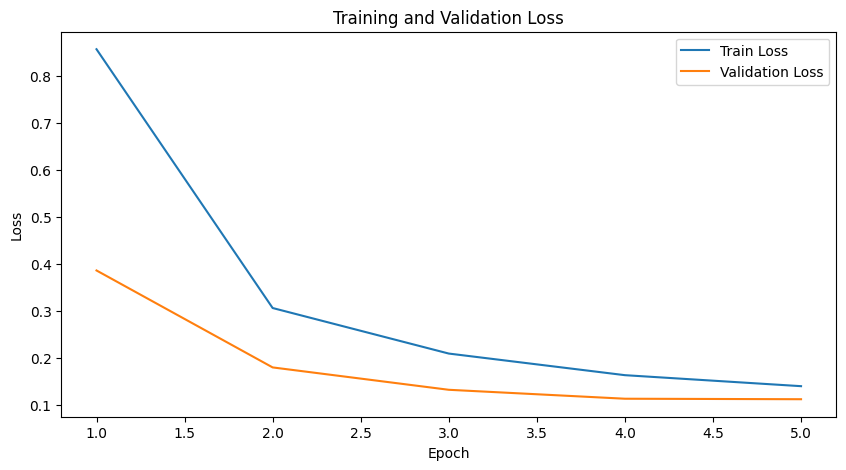

Test Accuracy: 96.62%


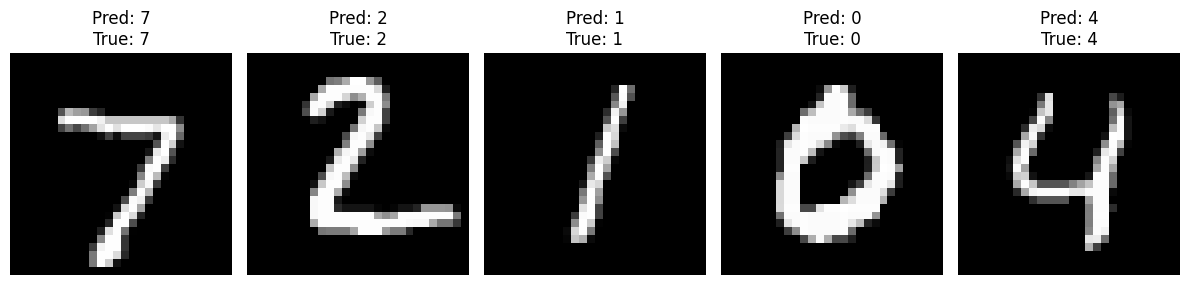

In [18]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Test the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()  # Count correct predictions

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')

# Function to visualize predictions
def visualize_predictions(model, data_loader, num_images=5):
    model.eval()
    images, labels = next(iter(data_loader))  # Get a batch of images
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(images)  # Get output from the model with images as input
        _, predicted = torch.max(outputs, 1)  # Get the predicted classes

    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i in range(num_images):
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')  # Display the image
        axes[i].set_title(f'Pred: {predicted[i]}\nTrue: {labels[i]}')  # Show predicted and true labels
        axes[i].axis('off')  # Turn off axis

    plt.tight_layout()
    plt.show()

# Visualize some predictions
visualize_predictions(model, test_loader)

### Question 4:
Validation loss saturates after how many epochs?

1.   1
2.   1.5
3.   2
4.   4



### Question 5:
What is the val loss at the end of 5th epoch? (choose the closest value)



1.   0.1077
2.   0.3441
3.   0.783
4.   1.450



### Question 6:
What is the test accuracy? (select closest value)


1.   96.70%
2.   50.39%
3.   85.30%
4.   06.69%

